In [181]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [182]:
yolo = cv.dnn.readNet(".\yolov3.weights", ".\yolov3.cfg")

In [183]:
classess = []
with open(".\coco.names", 'r') as f:
    classess = f.read().splitlines()
    

1000


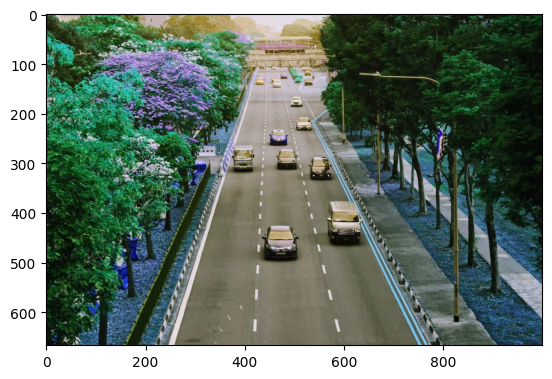

In [184]:
img = cv.imread("car.jpg")
height, width,_ = img.shape
print(width)
plt.imshow(img)

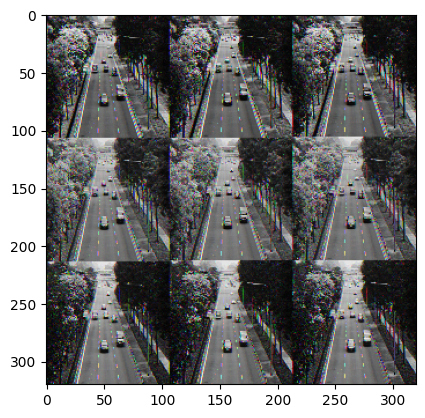

In [185]:
blob = cv.dnn.blobFromImage(img, 1/255, (320, 320), (0,0,0), swapRB=True, crop=False)
i = blob[0].reshape(320, 320, 3)
plt.imshow(i)

In [186]:
yolo.setInput(blob)

In [187]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [188]:
print((layeroutput[0][0][0]))

0.048921976


In [189]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id) 

In [190]:
print(len(boxes))

17


In [191]:
indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [192]:
font = cv.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [193]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classess[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv.rectangle(img, (x,y), (x+w, y+h), color, 3)
    cv.putText(img, label+""+confi, (x, y+20), font, 2, (255, 255, 255), 2) 

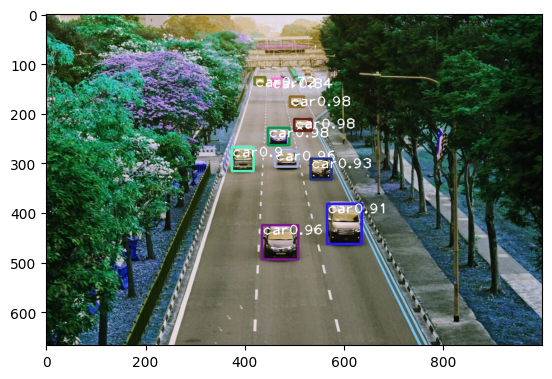

In [194]:
plt.imshow(img)